## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 04 : Linear Discriminant Analysis </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Christopher Darren"
myNIM = "00000054804"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Christopher Darren
NIM: 		00000054804
Start: 		2023-03-02 10:06:53.092746
Device ID: 	48551295-b8a7-11ed-9cd4-f02f74a116e8



---

### Dataset yang dipakai:

1. Drug          – sumber : https://www.kaggle.com/datasets/prathamtripathi/drug-classification
2. Glass          – sumber :https://www.kaggle.com/datasets/prashant111/glass-identification-dataset?select=glass_data.csv

### Hasil kerja

#### Part 1.Data Preprocessing

##### 1.1 import libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import utils

##### 1.2 Import the dataset

In [3]:
dataset = pd.read_csv(r'D:\SEMESTER 4\IF540 Machine Learning\LAB\week4\glass_data.csv')
X = dataset.iloc[:, :10].values
Y = dataset.iloc[:, 10].values

In [4]:
dataset.head(5)

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_a  214 non-null    int64  
 1   column_b  214 non-null    float64
 2   column_c  214 non-null    float64
 3   column_d  214 non-null    float64
 4   column_e  214 non-null    float64
 5   column_f  214 non-null    float64
 6   column_g  214 non-null    float64
 7   column_h  214 non-null    float64
 8   column_i  214 non-null    float64
 9   column_j  214 non-null    float64
 10  column_k  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
dataset.describe()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
dataset.shape

(214, 11)

In [8]:
#checking null

dataset.isnull().sum()

column_a    0
column_b    0
column_c    0
column_d    0
column_e    0
column_f    0
column_g    0
column_h    0
column_i    0
column_j    0
column_k    0
dtype: int64

In [9]:
def clean_dataset(dataset):
    assert isinstance(dataset, pd.DataFrame), "dataset needs to be a pd.DataFrame"
    dataset.dropna(inplace=True)
    indices_to_keep = ~dataset.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return dataset[indices_to_keep].astype(np.float64)

In [10]:
#get rid of infinite values.
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
#fill missing values
dataset.fillna(0, inplace=True)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_a  214 non-null    int64  
 1   column_b  214 non-null    float64
 2   column_c  214 non-null    float64
 3   column_d  214 non-null    float64
 4   column_e  214 non-null    float64
 5   column_f  214 non-null    float64
 6   column_g  214 non-null    float64
 7   column_h  214 non-null    float64
 8   column_i  214 non-null    float64
 9   column_j  214 non-null    float64
 10  column_k  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [13]:
#converting
#dataset['age'] = dataset['age'].astype(int)


#dataset["age"] = [float(str(i).replace("-", "+", "a+b")) for i in dataset["age"]]


#dataset['age'] = pd.to_numeric(dataset['age'])


In [14]:
#dataset_new = dataset.drop('age', axis=1)
#dataset_new.head(2)

In [15]:
#del dataset['age']

In [16]:
#X_ = dataset.iloc[:, :13].values
#Y_ = dataset.iloc[:, 13].values

##### 1.3 Split the dataset for test and train

In [17]:
# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [18]:
#feature Feature Scaling is the most important part of data preprocessing. If we see our
#dataset then some attribute contains information in Numeric value some value very high andsome
#are very low if we see the age and estimated salary.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)

#### Part 2. Building a Linear Discriminant analysis for Dimensionality Reduction

##### 2.1 Import the Libraries

In [19]:
# import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

##### 2.2 Initialize our model

In [20]:
# initialize the LDA
lda = LDA(n_components = 2)

##### 2.3 Fitting the Model

In [21]:
# fitting the LDA model
X_test = lda.fit_transform(X_test, y_test)
X_train = lda.transform(X_train)

##### 3.1 Import the Libraries

In [22]:
# import the Logistic Regression model from sklearn using the 2 variances with 
#,!the help of LDA

from sklearn.linear_model import LogisticRegression

##### 3.2 Initialize our Logistic Regression model

In [23]:
LG=LogisticRegression(random_state=0)

##### 3.3 Fitting the Model

In [24]:
# fit the Logistic Regression model
LG.fit(X_train,y_train)

LogisticRegression(random_state=0)

#### Part 4. Making a Prediction and Visualize the result

##### 4.1 Predict the test set Result

In [25]:
# predict the Logistic regression model
y_pred=LG.predict(X_test)

##### 4.2 Confusion Matrix

<AxesSubplot:>

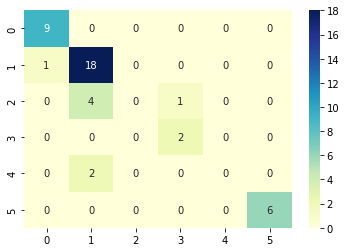

In [26]:
# making a confusion metrics
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")

##### 4.3 Visualize our Test Set Result

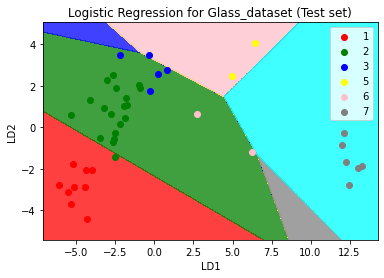

In [27]:
#Visualising the Test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].
                              max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].
                              max() + 1, step = 0.01))

plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green','blue','yellow','pink','grey','cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               color = ListedColormap(('red','green','blue','yellow','pink','grey','cyan'))(i), label = j)
plt.title('Logistic Regression for Glass_dataset (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()                    

###  Dataset 2 TUGAS MANDIRI

##### 1.2.1  Import the dataset

In [28]:
dataset2 = pd.read_csv(r'D:\SEMESTER 4\IF540 Machine Learning\LAB\week4\drug200.csv')
Xnew = dataset2.iloc[:, :5].values
Ynew = dataset2.iloc[:, 5].values
dataset2.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [29]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [30]:
dataset2.shape

(200, 6)

In [31]:
dataset2.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [32]:
#checking null

dataset2.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [33]:
# displaying the datatypes
display(dataset2.dtypes)
  
# converting 'Weight' and 'Salary' from float to int
dataset2['Na_to_K'] = dataset2['Na_to_K'].astype(str)
  
# displaying the datatypes
display(dataset2.dtypes)

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

Age             int64
Sex            object
BP             object
Cholesterol    object
Na_to_K        object
Drug           object
dtype: object

In [34]:
#encoding

def encode_data(feature_name):
    '''
    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with
    '''
    mapping_dict = {}
    
    unique_values = list(dataset2[feature_name].unique())
    
    
    for idx in range(len(unique_values)):
        
        mapping_dict[unique_values[idx]] = idx
        
    return mapping_dict

dataset2['Sex'].replace(encode_data('Sex'), inplace = True)

dataset2['BP'].replace(encode_data('BP'), inplace = True)

dataset2['Cholesterol'].replace(encode_data('Cholesterol'), inplace = True)

dataset2['Drug'].replace(encode_data('Drug'), inplace = True)

In [35]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          200 non-null    int64 
 1   Sex          200 non-null    int64 
 2   BP           200 non-null    int64 
 3   Cholesterol  200 non-null    int64 
 4   Na_to_K      200 non-null    object
 5   Drug         200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [36]:
Xnew1 = dataset2.iloc[:, :5].values
Ynew1 = dataset2.iloc[:, 5].values
dataset2.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,1
2,47,1,1,0,10.114,1


##### 1.3.1 Split the dataset for test and train for drug test

In [37]:
# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xnew1,Ynew1, test_size=0.2, random_state=0)

In [38]:
#feature Feature Scaling is the most important part of data preprocessing. If we see our
#dataset then some attribute contains information in Numeric value some value very high andsome
#are very low if we see the age and estimated salary.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train1 = sc_X.fit_transform(X_train1)

X_test1 = sc_X.transform(X_test1)

##### 2.1.1 Import the Libraries

In [39]:
# import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

##### 2.2.1 Initialize our model

In [40]:
# initialize the LDA
lda2 = LDA(n_components = 2)

##### 2.3.1 Fitting the Model

In [41]:
# fitting the LDA model
X_test1 = lda2.fit_transform(X_test1, y_test1)
X_train1 = lda2.transform(X_train1)

#####  3.1.1 Import the Libraries

In [42]:
# import the Logistic Regression model from sklearn using the 2 variances with 
#,!the help of LDA

from sklearn.linear_model import LogisticRegression

##### 3.2.1 Initialize our Logistic Regression model

In [43]:
LG1=LogisticRegression(random_state=0)

##### 3.3.1  Fitting the Model

In [44]:
# fit the Logistic Regression model
LG1.fit(X_train1,y_train1)

LogisticRegression(random_state=0)

##### 4.1.1 Predict the test set Result

In [45]:
# predict the Logistic regression model
y_pred1=LG1.predict(X_test1)

##### 4.2.1 Confusion Matrix

In [46]:
y_pred1.shape

(40,)

In [47]:
y_test1.shape

(40,)

[Text(0.5, 1.0, 'Confusion Metrics for Drug Test')]

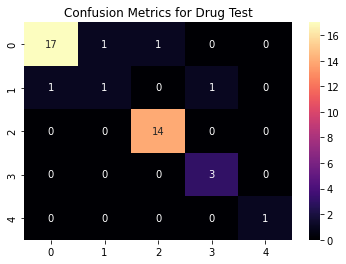

In [48]:
# making a confusion metrics
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(y_test1,y_pred1)
sns.heatmap(confusion_matrix1, annot=True, cmap="magma").set(title='Confusion Metrics for Drug Test')

##### 4.3 Visualize our Test Set Result

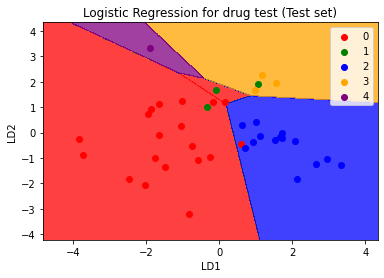

In [49]:
#Visualising the Test set results

from matplotlib.colors import ListedColormap
X_set1, y_set1 = X_test1, y_test1

X1drug, X2drug = np.meshgrid(np.arange(start = X_set1[:, 0].min() - 1, stop = X_set1[:, 0].
                              max() + 1, step = 0.01),
                    np.arange(start = X_set1[:, 1].min() - 1, stop = X_set1[:, 1].
                              max() + 1, step = 0.01))

plt.contourf(X1drug, X2drug, LG1.predict(np.array([X1drug.ravel(), X2drug.ravel()]).T).reshape(X1drug.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green','blue','orange','purple')))
plt.xlim(X1drug.min(), X1drug.max())
plt.ylim(X2drug.min(), X2drug.max())
for i, j in enumerate(np.unique(y_set1)):
    plt.scatter(X_set1[y_set1 == j, 0], X_set1[y_set1 == j, 1],
               color = ListedColormap(('red','green','blue','orange','purple'))(i), label = j)
plt.title('Logistic Regression for drug test (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show() 

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Hasil perbandingan akurasi antara algoritma menurut saya berbeda karena class dataset antara glass dan Drug berbeda.
    - Pada week ini saya belajar tentang LDA. LDA merupakan sebuah teknik analisis statistik multivariat yang digunakan untuk memisahkan atau mengklasifikasikan data menjadi dua atau lebih kelompok yang telah ditentukan sebelumnya berdasarkan variabel prediktor yang diukur. di dalam modul ini saya mencoba dataset antara glass dan drug. Selain LDA, saya juga menggunakan Logistic regression, training data supaya bisa melihat hasil dari LDA yang saya sudah buat. Pada akhir dari praktikum ini semua hasilnya dibuat menjadi visualisasi menggunakan scatter plot dengan batas batas class yang sudah diinput pada proses predict serta train_model. 

In [50]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Christopher Darren
NIM: 	00000054804
Time-stamp:	2023-03-05 21:36:55.981883


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [51]:
!jupyter nbconvert --to html "./IF540_Kelas EL_00000054804_Christopher Darren_Week04.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_Kelas EL_00000054804_Christopher Darren_Week04.ipynb to html
[NbConvertApp] Writing 737312 bytes to IF540_Kelas EL_00000054804_Christopher Darren_Week04.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#